#  Aisha Nawaz 

## Step 1 Data Collection:
### a) Hadith Data: You can use online Hadith databases or APIs that provide authentic Hadith collections in English. One popular source is the Sahih al-Bukhari collection.

In [1]:
# For hadiths, I am using data from : https://www.kaggle.com/datasets/fahd09/hadith-dataset?select=all_hadiths_clean.csv

import pandas as pd
dataHADITHS=pd.read_csv('hadiths.csv')
dataHADITHS.head()

,id,hadith_id,source,chapter_no,hadith_no,chapter,chain_indx,text_ar,text_en
0,0,1,Sahih Bukhari,1,1,Revelation - كتاب بدء الوحى,"30418, 20005, 11062, 11213, 11042, 3",حدثنا الحميدي عبد الله بن الزبير، قال حدثنا سف...,Narrated 'Umar bin Al-Khattab: ...
1,1,2,Sahih Bukhari,1,2,Revelation - كتاب بدء الوحى,"30355, 20001, 11065, 10511, 53",حدثنا عبد الله بن يوسف، قال أخبرنا مالك، عن هش...,Narrated 'Aisha: ...
2,2,3,Sahih Bukhari,1,3,Revelation - كتاب بدء الوحى,"30399, 20023, 11207, 11013, 10511, 53",حدثنا يحيى بن بكير، قال حدثنا الليث، عن عقيل، ...,Narrated 'Aisha: (the m...
3,3,4,Sahih Bukhari,1,4,Revelation - كتاب بدء الوحى,"11013, 10567, 34",قال ابن شهاب وأخبرني أبو سلمة بن عبد الرحمن، أ...,Narrated Jabir bin 'Abdullah Al-Ansari while ...
4,4,5,Sahih Bukhari,1,5,Revelation - كتاب بدء الوحى,"20040, 20469, 11399, 11050, 17",حدثنا موسى بن إسماعيل، قال حدثنا أبو عوانة، قا...,Narrated Said bin Jubair: ...


In [2]:
dataHADITHS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34441 entries, 0 to 34440
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          34441 non-null  int64 
 1   hadith_id   34441 non-null  int64 
 2   source      34441 non-null  object
 3   chapter_no  34441 non-null  int64 
 4   hadith_no   34441 non-null  object
 5   chapter     34441 non-null  object
 6   chain_indx  34318 non-null  object
 7   text_ar     34433 non-null  object
 8   text_en     33588 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.4+ MB


### b) Quran Translation Data: Obtain an English translation of the Quran, either through APIs or downloadable datasets.

In [3]:
# Obtaining data through APIs . Source Used: https://alquran.cloud/api
import requests

url = "http://api.alquran.cloud/v1/quran/en.asad"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()  #Will convert the response to dictionary
    print(data['status'])
else:
    print("Error:", response.status_code)

OK


In [4]:
QuranTranslations={
    'Surah Number':[],
    'Surah Name':[],
    'English Translation':[]
}
for i in range (114): #Turning the data retreived above in more easy to use form by creating another dictionary
    QuranTranslations['Surah Number'].append(i+1)
    QuranTranslations['Surah Name'].append(data['data']['surahs'][i]['englishName'])
    allAyahs=data['data']['surahs'][i]['ayahs']
    completeTranslation=[]
    for j in range (len(allAyahs)):  #Combing all ayahs translation of that surah
                    completeTranslation.append(allAyahs[j]['text'])
    QuranTranslations['English Translation'].append('\n'.join(map(str,completeTranslation)))

In [5]:
#Sample Preview
def printTranslation(ayahNum):
    print('Surah Name:',QuranTranslations['Surah Name'][ayahNum-1],'\nTranslation:')
    print(QuranTranslations['English Translation'][ayahNum-1])

printTranslation(1)

Surah Name: Al-Faatiha 
Translation:
In the name of God, The Most Gracious, The Dispenser of Grace:
All praise is due to God alone, the Sustainer of all the worlds,
The Most Gracious, the Dispenser of Grace,
Lord of the Day of Judgment!
Thee alone do we worship; and unto Thee alone do we turn for aid.
Guide us the straight way.
The way of those upon whom Thou hast bestowed Thy blessings, not of those who have been condemned [by Thee], nor of those who go astray!


In [6]:
#Sample Preview 2
printTranslation(114)

Surah Name: An-Naas 
Translation:
SAY: "I seek refuge with the Sustainer of men,
"the Sovereign of men,
"the God of men,
"from the evil of the whispering, elusive tempter
"who whispers in the hearts of men
"from all [temptation to evil by] invisible forces as well as men,"


In [7]:
#Sample Preview 3
printTranslation(109)

Surah Name: Al-Kaafiroon 
Translation:
SAY: "O you who deny the truth!
"I do not worship that which you worship,
and neither do you worship that which I worship!
"And I will not worship ~hat which you have [ever] worshipped,
and neither will you [ever] worship that which I worship.
Unto you, your moral law, and unto me, mine!"


In [8]:
# Converting to DataFrame
dataQURAN=pd.DataFrame(QuranTranslations)
dataQURAN.head()

,Surah Number,Surah Name,English Translation
0,1,Al-Faatiha,"In the name of God, The Most Gracious, The Dis..."
1,2,Al-Baqara,Alif. Lam. Mim.\nTHIS DIVINE WRIT - let there ...
2,3,Aal-i-Imraan,Alif. Lam. Mim.\nGOD - there is no deity save ...
3,4,An-Nisaa,"O MANKIND! Be conscious of your Sustainer, who..."
4,5,Al-Maaida,O YOU who have attained to faith! Be true to y...


In [9]:
# Saving as csv file for later use
dataQURAN.to_csv('QuranTranslations.csv',index=False)

## Step 2 Data Scraping:
## NOTE Quality Control: Ensure that the scraped data is accurate and authentic, especially when dealing with religious texts. Validate the sources and cross-reference the information.

### a) For Hadith: Write a script to scrape Hadith related to the Five Pillars of Islam from the chosen source. This might involve searching for specific keywords related to each pillar within the Hadith texts.

In [14]:
# Defining keywords for each pillar
pillarNames = {
0: "Shahada",
1: "Salat",
2: "Zakat",
3: "Sawm",
4: "Hajj"
}
pillarKeywords = {
    0: ['faith', 'belief', 'testimony', 'Allah', 'witness', 'declaration','submission', 'testify', 'monotheistic', 'alone', 'profess', 'oneness'],
    1: ['prayer', 'salat', 'namaz', 'worship', 'ritual', 'devotion','communion', 'bow', 'faithfulness', 'spirituality', 'communication', 'rakaat'],
    2: ['charity', 'zakat', 'almsgiving', 'donation', 'generosity', 'money','sharing', 'relief', 'social responsibility', 'spend', 'financial assistance', 'benevolence'],
    3: ['fasting', 'sawm', 'roza', 'abstain', 'refrain', 'discipline','control', 'introspection', 'desires', 'willpower', 'limit', 'purification'],
    4: ['pilgrimage', 'hajj', 'pilgrim', 'mecca', 'kaaba', 'taawaf','holy sites', 'as-safa', 'unity', 'rituals', 'al-marwa', 'obligation']
}

for i in range (5):
    print('\n---------------------> Pillar : ',pillarNames[i])
    print('Keywords:')
    print(' , '.join(map(str,pillarKeywords[i])))


---------------------> Pillar :  Shahada
Keywords:
faith , belief , testimony , Allah , witness , declaration , submission , testify , monotheistic , alone , profess , oneness

---------------------> Pillar :  Salat
Keywords:
prayer , salat , namaz , worship , ritual , devotion , communion , bow , faithfulness , spirituality , communication , rakaat

---------------------> Pillar :  Zakat
Keywords:
charity , zakat , almsgiving , donation , generosity , money , sharing , relief , social responsibility , spend , financial assistance , benevolence

---------------------> Pillar :  Sawm
Keywords:
fasting , sawm , roza , abstain , refrain , discipline , control , introspection , desires , willpower , limit , purification

---------------------> Pillar :  Hajj
Keywords:
pilgrimage , hajj , pilgrim , mecca , kaaba , taawaf , holy sites , as-safa , unity , rituals , al-marwa , obligation


In [15]:
# For Hadiths:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

ByPillar={
    'Pillar':[pillarNames[i] for i in range (len(pillarNames))],
    'Hadith':[[],[],[],[],[]],
    'Ayahs':[[],[],[],[],[]]
}

stopWords = set(stopwords.words("english"))

# Tokenizing each hadiths & checking for keyword match according to each pillar
for i in range (len(dataHADITHS['text_en'])):
                hadith=dataHADITHS['text_en'][i]
                words = word_tokenize(str(hadith).lower()) # Tokenizing
                filteredWords = [word for word in words if word.isalnum() and word not in stopWords] #Removing stop words

                for pillar,keywords in pillarKeywords.items():
                    if(any(keyword in filteredWords for keyword in keywords)):
                        ByPillar['Hadith'][pillar].append(' '.join(map(str,hadith.split(' ')))) #Removing extra spaces & appending

In [16]:
for i in range (5): #Printing first hadith categorized by pillar (For preview purposes)
    print("Pillar------> ",pillarNames[i])
    print('Hadith:')
    print(ByPillar['Hadith'][i][0])

Pillar------>  Shahada
Hadith:
 Narrated 'Aisha:                       (the mother of the faithful believers) The commencement of the Divine Inspiration to Allah's Apostle was in the form of good dreams which came true like bright daylight, and then the love of seclusion was bestowed upon him. He used to go in seclusion in the cave of Hira where he used to worship (Allah alone) continuously for many days before his desire to see his family. He used to take with him the journey food for the stay and then come back to (his wife) Khadija to take his food likewise again till suddenly the Truth descended upon him while he was in the cave of Hira. The angel came to him and asked him to read. The Prophet replied, "I do not know how to read." The Prophet added, "The angel caught me (forcefully) and pressed me so hard that I could not bear it any more. He then released me and again asked me to read and I replied, 'I do not know how to read.' Thereupon he caught me again and pressed me a second 

### b) For Quran Translation: Extract Ayahs related to the Five Pillars from the English Quran translation.

In [17]:
# For Ayahs
# Tokenization
stopWords = set(stopwords.words("english"))

# Tokenizing each ayah & checking for keyword match according to each pillar
for i in range (len(QuranTranslations['English Translation'])):
                ayahsALL=QuranTranslations['English Translation'][i].split('\n')
                for ayah in ayahsALL:
                      words = word_tokenize(str(ayah).lower()) # Tokenizing
                      filteredWords = [word for word in words if word.isalnum() and word not in stopWords]

                      for pillar,keywords in pillarKeywords.items():
                                 if(any(keyword in filteredWords for keyword in keywords)):
                                       ByPillar['Ayahs'][pillar].append(' '.join(map(str,ayah.split(' ')))) #Removing extra spaces & appending

In [18]:
for i in range (5): #Printing first Ayah only categorized by pillar (For preview purposes)
    print("Pillar------> ",pillarNames[i])
    print('Ayah:')
    print(ByPillar['Ayahs'][i][0])

Pillar------>  Shahada
Ayah:
All praise is due to God alone, the Sustainer of all the worlds,
Pillar------>  Salat
Ayah:
Thee alone do we worship; and unto Thee alone do we turn for aid.
Pillar------>  Zakat
Ayah:
Who believe in [the existence of] that which is beyond the reach of human perception, and are constant in prayer, and spend on others out of what We provide for them as sustenance;
Pillar------>  Sawm
Ayah:
O YOU who have attained to faith! Fasting is ordained for you as it was ordained for those before you, so that you might remain conscious of God:
Pillar------>  Hajj
Ayah:
[Hence,] behold, As-Safa and Al-Marwah are among the symbols set up by God; and thus, no wrong does he who, having come to the Temple on pilgrimage or on a pious visit, strides to and fro between these two: for, if one does more good than he is bound to do-behold, God is responsive to gratitude, all-knowing.


## Step 3 Text Analysis:

### Keyword Extraction: Use natural language processing techniques to extract keywords related to each of the Five Pillars from the scraped data.

In [19]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tag import pos_tag

stopWords = set(stopwords.words("english"))

def getKeywords(text):
    text=' '.join(map(str,text)) #Converting to str form
 
    tokens = word_tokenize(text) #Tokenizing
    
    # Removing stopwords
    filtered = [word for word in tokens if word.lower() not in stopWords]
    
    # part-of-speech tagging
    tagged = pos_tag(filtered)
    keywords = [word for word, pos in tagged if pos in ["NN", "NNS", "NNP", "NNPS"]]
    
    # Calculating word frequency
    fdist = FreqDist(keywords)
    
    # Getting 10 most common keywords only
    top10 = list(fdist.most_common(10))
    # Storing the keywords to return
    KEYWORDS = [w for w, count in top10 if not (w == '[') and not( w == ']')]
    return KEYWORDS

keyALL=[]
for i in range(5):
    keyW=getKeywords(ByPillar['Hadith'][i])+getKeywords(ByPillar['Ayahs'][i])
    print('\nKeywords for Pillar \"',pillarNames[i],"\" are:")
    print(keyW)
    keyALL.append(keyW) #Storing keywords in list , index 0 has all keywords of first pillar , 2 has of second pillar and so on


Keywords for Pillar " Shahada " are:
['Allah', 'Messenger', 'Prophet', 'people', 'Abu', 'Apostle', 'ﷺ', 'bin', 'man', 'upon', 'God', 'faith', 'truth', 'Sustainer', 'people', 'life', 'witness', 'Day']

Keywords for Pillar " Salat " are:
['Allah', 'prayer', 'Messenger', 'Prophet', 'ﷺ', 'Abu', 'people', 'bin', 'upon', 'Apostle', 'God', 'worship', 'prayer', 'Sustainer', 'people', 'truth', 'Worship', '”']

Keywords for Pillar " Zakat " are:
['Allah', 'Messenger', 'Prophet', 'Abu', 'charity', 'Apostle', 'people', 'bin', 'man', 'upon', 'God', 'charity', 'prayer', 'others', 'people', 'cause', 'men', 'women']

Keywords for Pillar " Sawm " are:
['Allah', 'Messenger', 'Prophet', 'Abu', 'ﷺ', 'people', 'day', 'Apostle', 'bin', 'upon', 'God', 'desires', 'thou', 'life', 'faith', 'days', 'man', 'world']

Keywords for Pillar " Hajj " are:
['Allah', 'Prophet', 'Messenger', 'Hajj', 'Apostle', 'Mecca', 'people', 'Abu', 'bin', 'Ibn', 'God', 'pilgrimage', 'faith', 'unity', 'truth', 'Hence', 'House', 'Worsh

## Step 4 Sentiment Analysis: Perform sentiment analysis on the extracted text to gauge the tone of the content related to each pillar.

In [20]:
from textblob import TextBlob

def getTONE(data):
    blob = TextBlob(data)
    polarity = blob.sentiment.polarity
    
    # Determining the label based on polarity calculated above  
    if polarity > 0:
        sentimentLABEL = "Positive"
    elif polarity < 0:
        sentimentLABEL = "Negative"
    else:
        sentimentLABEL = "Neutral"
        
    return polarity,sentimentLABEL

for i in range (5):
    #Combining & Converting to str form Text of Hadiths and Quran Ayahs
    content=' '.join(map(str,ByPillar['Hadith'][i]))+' '.join(map(str,ByPillar['Ayahs'][i]))
    p,l=getTONE(content)
    print ('\n~~~~~~~~~~~~~~~~~~~~~~ For Pillar \"',pillarNames[i],"\" ~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Sentiment Polarity Value ---> ", p)
    print("Sentiment Label --->", l)


~~~~~~~~~~~~~~~~~~~~~~ For Pillar " Shahada " ~~~~~~~~~~~~~~~~~~~~~~~~~~
Sentiment Polarity Value --->  0.1251046168875932
Sentiment Label ---> Positive

~~~~~~~~~~~~~~~~~~~~~~ For Pillar " Salat " ~~~~~~~~~~~~~~~~~~~~~~~~~~
Sentiment Polarity Value --->  0.0935939465106434
Sentiment Label ---> Positive

~~~~~~~~~~~~~~~~~~~~~~ For Pillar " Zakat " ~~~~~~~~~~~~~~~~~~~~~~~~~~
Sentiment Polarity Value --->  0.10300187918828985
Sentiment Label ---> Positive

~~~~~~~~~~~~~~~~~~~~~~ For Pillar " Sawm " ~~~~~~~~~~~~~~~~~~~~~~~~~~
Sentiment Polarity Value --->  0.12822185089555646
Sentiment Label ---> Positive

~~~~~~~~~~~~~~~~~~~~~~ For Pillar " Hajj " ~~~~~~~~~~~~~~~~~~~~~~~~~~
Sentiment Polarity Value --->  0.08508735270413373
Sentiment Label ---> Positive


## Step 5 Topic Modeling: Apply topic modeling techniques like Latent Dirichlet Allocation (LDA) to identify common themes and topics within the scraped text.

In [21]:
from gensim import corpora, models
import gensim

def getDominantThemeTopic(data):
    
    words = data.split()
    dictionary = corpora.Dictionary([words]) #Creating a dictionary
    
    # Creating a corpus 
    corpus = [dictionary.doc2bow(words)]
    
    # Building the LDA model
    ldaModel = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
    
    # Printing the topics and their corresponding words
    for i, topic in ldaModel.print_topics(-1):
         print("Topic # ",i ,':',topic)

    # Printing the dominant topic 
    print("Dominant Topic:", ldaModel[corpus[0]])
    
for i in range (5):
    #Combining & Converting to str form
    content=' '.join(map(str,ByPillar['Hadith'][i]))+' '.join(map(str,ByPillar['Ayahs'][i]))
    print ('\n~~~~~~~~~~~~~~~~~~~~~~ For Pillar \"',pillarNames[i],"\" ~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Dominant Theme/Topic ---> ")
    getDominantThemeTopic(content)


~~~~~~~~~~~~~~~~~~~~~~ For Pillar " Shahada " ~~~~~~~~~~~~~~~~~~~~~~~~~~
Dominant Theme/Topic ---> 
Topic #  0 : 0.000*"the" + 0.000*"of" + 0.000*"and" + 0.000*"to" + 0.000*"I" + 0.000*"that" + 0.000*"a" + 0.000*"he" + 0.000*"is" + 0.000*"He"
Topic #  1 : 0.002*"the" + 0.002*"to" + 0.002*"and" + 0.001*"of" + 0.001*"he" + 0.001*"that" + 0.001*"be" + 0.001*"you" + 0.001*"Allah" + 0.001*"is"
Topic #  2 : 0.045*"the" + 0.035*"and" + 0.029*"of" + 0.026*"to" + 0.014*"I" + 0.013*"that" + 0.013*"he" + 0.012*"is" + 0.011*"a" + 0.011*"in"
Topic #  3 : 0.000*"the" + 0.000*"of" + 0.000*"to" + 0.000*"and" + 0.000*"I" + 0.000*"he" + 0.000*"that" + 0.000*"is" + 0.000*"in" + 0.000*"you"
Topic #  4 : 0.002*"the" + 0.002*"of" + 0.001*"and" + 0.001*"to" + 0.001*"he" + 0.001*"I" + 0.001*"is" + 0.001*"a" + 0.000*"in" + 0.000*"that"
Dominant Topic: [(2, 0.9999973)]

~~~~~~~~~~~~~~~~~~~~~~ For Pillar " Salat " ~~~~~~~~~~~~~~~~~~~~~~~~~~
Dominant Theme/Topic ---> 
Topic #  0 : 0.000*"the" + 0.000*"and" + 0.0

## Step 6 Data Presentation:

### a) Visualization: Create visualizations such as word clouds, bar graphs, and pie charts to represent the distribution of content related to each pillar.


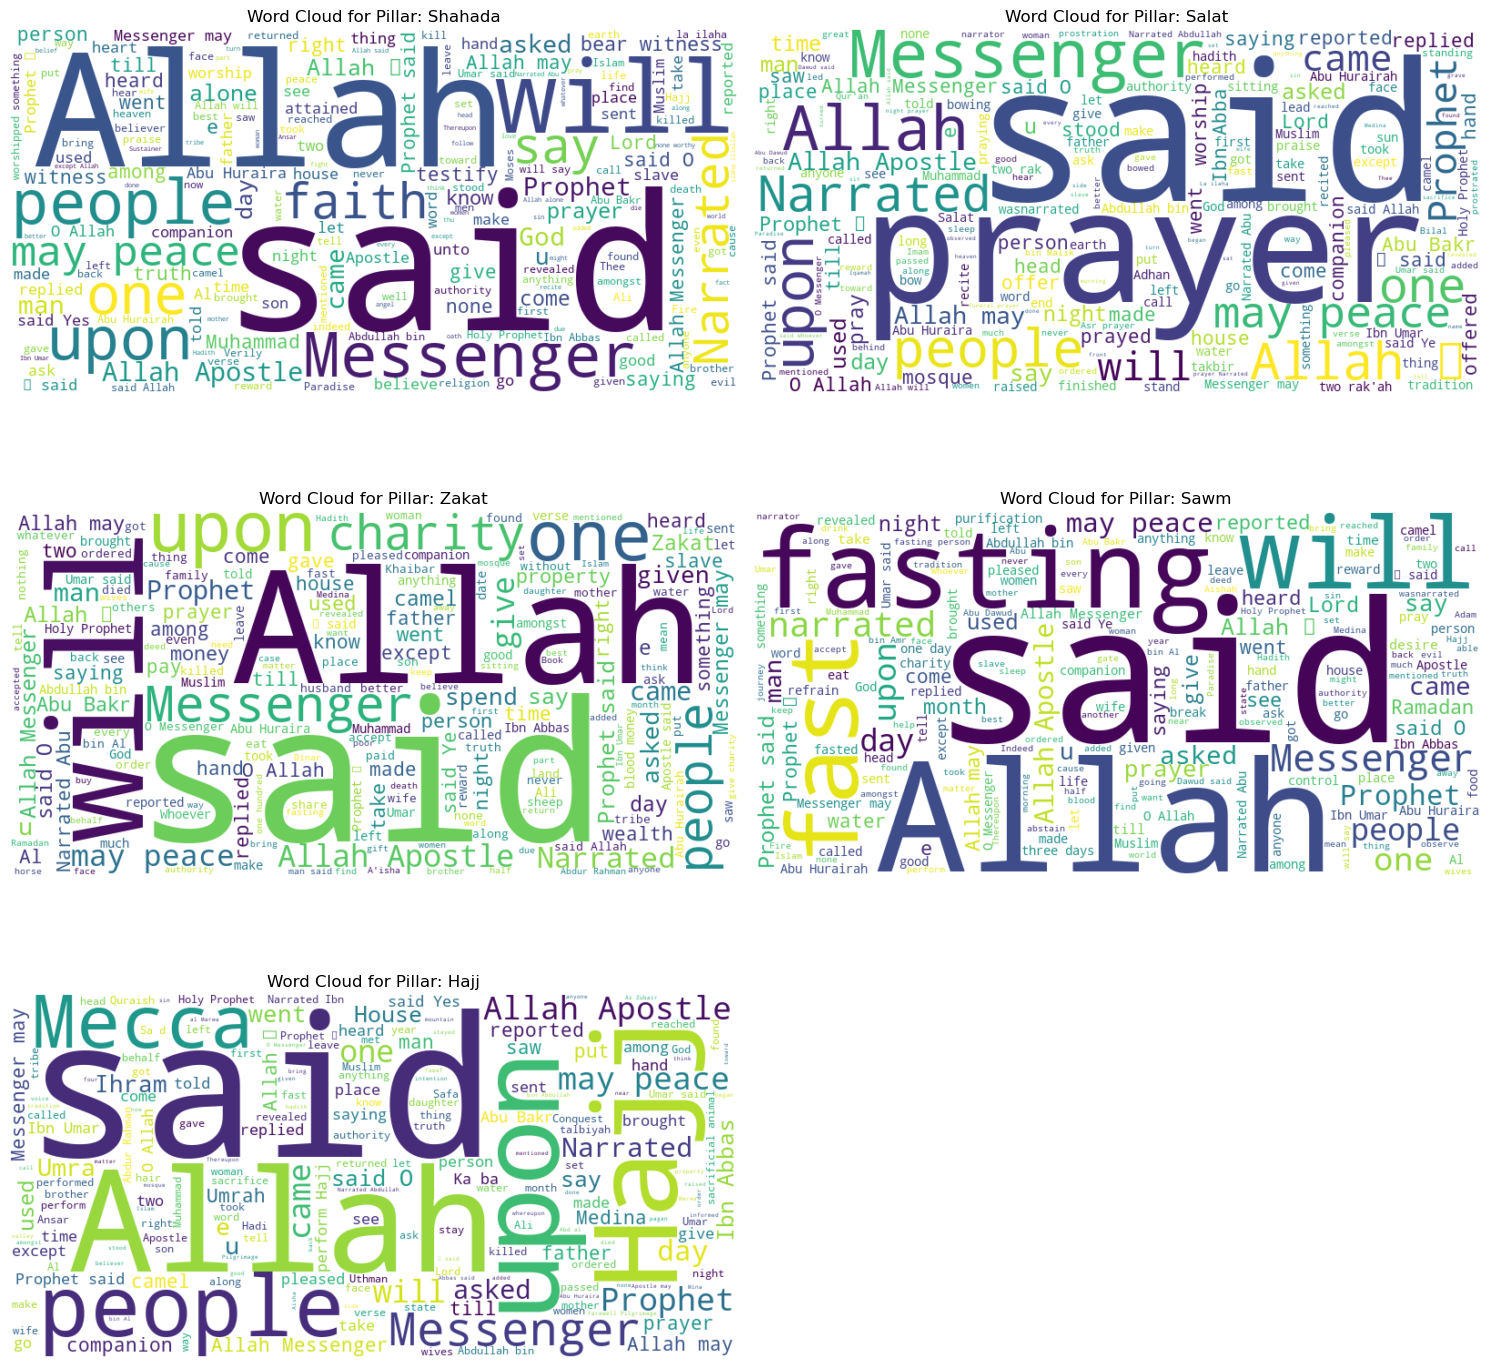

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

def getWORDCLOUD(data,i,title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data)
    
    # Plotting the word cloud
    plt.subplot(3, 2,i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')

for i in range (5):
    #Combining & Converting to str form text from Hadiths & Quran Ayahs
    content=' '.join(map(str,ByPillar['Hadith'][i]))+' '.join(map(str,ByPillar['Ayahs'][i]))
    getWORDCLOUD(content,i,'Word Cloud for Pillar: '+pillarNames[i])
    
plt.tight_layout()
plt.show()

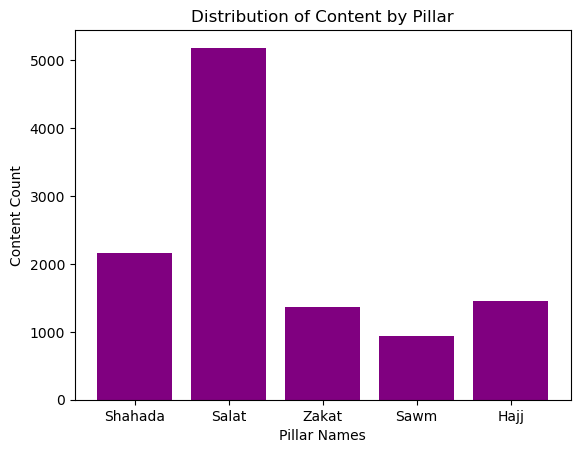

In [23]:
# Creating Bar Chart
import matplotlib.pyplot as plt
count = [len(ByPillar['Hadith'][i])+len(ByPillar['Ayahs'][i]) for i in range(5)]  

plt.bar(x=pillarNames.values(),height=count, color='Purple')
plt.xlabel('Pillar Names')
plt.ylabel('Content Count')
plt.title('Distribution of Content by Pillar')
plt.show()

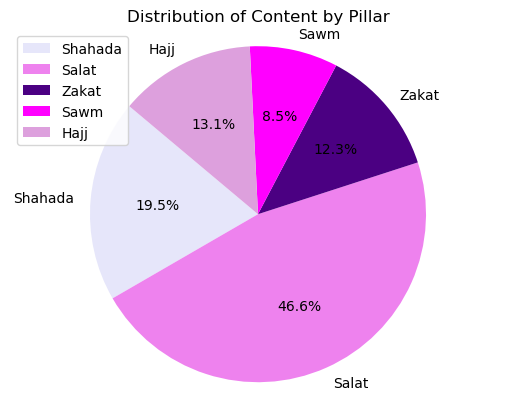

In [24]:
# Creating a pie chart 
import matplotlib.pyplot as plt
plt.pie(count, labels=pillarNames.values(), autopct='%1.1f%%', startangle=140,colors=['lavender', 'violet', 'indigo', 'magenta', 'plum'])
plt.axis('equal') 
plt.legend()
plt.title('Distribution of Content by Pillar')
plt.show()

### b) Text Summarization: Generate summaries for each pillar by selecting the most representative and informative sentences or Ayahs.

In [25]:
from summa.summarizer import summarize

def getSUMMARY(data,pillarNum):
    #Dictionary to keep track & find most matched text
    matches={'TEXT':[],
            'NUMBER OF WORDS MATCHED':[]}
    for ayah in data: #Each Ayah/Hadith in that pillar
        
        wordsTOKEN = word_tokenize(str(ayah).lower()) # Tokenizing
        wordsTXT = [word for word in wordsTOKEN if word.isalnum() and word not in stopWords] #Removing stop words
        
        for words in wordsTXT:
            matchesLEN=[word for word in pillarKeywords[pillarNum] if word==words.lower()] #Count number of words that match with key words
            count=len(matchesLEN)
        matches['TEXT'].append(ayah)
        matches['NUMBER OF WORDS MATCHED'].append(count)
    return max(matches['NUMBER OF WORDS MATCHED']),data[matches['NUMBER OF WORDS MATCHED'].index(max(matches['NUMBER OF WORDS MATCHED']))] #Returning the ayah/hadith with most matches

for i in range (5):
    print ('\n~~~~~~~~~~~~~~~~~~~~~~ For Pillar \"',pillarNames[i],"\" ~~~~~~~~~~~~~~~~~~~~~~~~~~")
    c1,text1=getSUMMARY(ByPillar['Ayahs'][i],i) #First get matches for Quran Ayahs
    c2,text2=getSUMMARY(ByPillar['Hadith'][i],i) #Second get matches for Hadiths
    if(c1>=c2): #Displaying the one with most match
        print("From Quran")
        print("Summary --->\n", text1)
    else:
        print("From Hadiths")
        print("Summary --->\n", text2)


~~~~~~~~~~~~~~~~~~~~~~ For Pillar " Shahada " ~~~~~~~~~~~~~~~~~~~~~~~~~~
From Quran
Summary --->
 And if [others] come to believe in the way you believe, they will indeed find themselves on the right path; and if they turn away, it is but they who will be deeply in the wrong, and God will protect thee from them: for He alone is all-hearing, all-knowing.

~~~~~~~~~~~~~~~~~~~~~~ For Pillar " Salat " ~~~~~~~~~~~~~~~~~~~~~~~~~~
From Quran
Summary --->
 and be constant in prayer, and spend in charity, and bow down in prayer with all who thus bow down.

~~~~~~~~~~~~~~~~~~~~~~ For Pillar " Zakat " ~~~~~~~~~~~~~~~~~~~~~~~~~~
From Quran
Summary --->
 If, however, [the debtor] is in straitened circumstances, [grant him] a delay until a time of ease; and it would be for your own good -if you but knew it -to remit [the debt entirely] by way of charity.

~~~~~~~~~~~~~~~~~~~~~~ For Pillar " Sawm " ~~~~~~~~~~~~~~~~~~~~~~~~~~
From Quran
Summary --->
 by the lote-tree of the farthest limit,

~~~~~~~~~

## Step 7 Search Functionality:

### Implement a search function that allows users to search for specific keywords or themes related to each pillar in the collected data.

In [32]:
# Color Codes
R = '\033[31m'
G = '\033[32m'
B = '\033[34m'
M = '\033[35m'
C = '\033[36m'
N = '\033[0m'

from timeit import default_timer as timer
def search(keywords,limit=None):
    keywords=keywords.split(",") #Splitting keywords
    results = []
    counter=0
    limitFLAG=False
    
    for i in range(5):
        
        for keyword in keywords:
            
            for hadith in ByPillar['Hadith'][i]:
                 if keyword.lower() in hadith.lower():
                        if(limit and counter>=int(limit)): #Break if limit exists & is execeeded
                            limitFLAG=True
                            break
                        results.append((pillarNames[i], hadith, 'Hadith'))
                        counter=counter+1
            if(limitFLAG):
                break
           
                if keyword.lower() in ayah.lower():
                    if(limit and counter>=int(limit)): #Break if limit exists & is execeeded
                        limitFLAG=True
                        break
                    results.append((pillarNames[i], ayah, 'Ayah'))
                    counter=counter+1
            
            if(limitFLAG):
                break
       
        if(limitFLAG): #Breaking from the last loop
             break
    return counter,list(dict.fromkeys(results)) #Returning unique results

def userInterface():
    print(G+'Welcome to the Hadiths & Quran Ayahs Searcher!'+N)
    i=0
    while (True):
        
        print('\nEnter Keywords(comma-separated) or theme to search Ayahs & Hadiths related to each pillar')
        inp = input("")
        
        while(True): #Like do while loop for incorrect user inputs
            limit=input("Do you wish to limit the number of search results? (Y/N): ")
            if(limit.lower() not in 'y' and limit.lower() not in 'n'):
                print(R+'ERROR! Please enter Y for yes and N for No'+N)
            else:
                break
    
        if(limit.lower() in 'y'):
            while(True): #Checking valid num entered
                limitNUM=input("Enter limit of Search Results: ")
                if(limitNUM.isnumeric() and int(limitNUM)>0):
                    break
                else:
                    print(R+"ERROR! Please enter a NUMERIC value greater than ZERO."+N)
        else:
            limitNUM=None
        
        start=timer()
        numR,results = search(inp,limitNUM)
        end=timer()
        
        if results:
            print('\n',numR,'Results found in',round((end-start),5),'seconds! Search Results are as follows:\n')
            searchRESULTS={'Pillar':[],'Type':[],'Text':[]} #dictionary to save results in csv file later
            j=0
            for result in results:
                j=j+1
                print('\n--------------------------------------------------RESULT # ',j,'---------------------------------------')
                
                print(M+"Pillar:", result[0],N)
                searchRESULTS['Pillar'].append(result[0])
                
                print(C+'Type: ',result[2],N)
                searchRESULTS['Type'].append(result[2])
                
                print(G+"Text: " , result[1],N)
                searchRESULTS['Text'].append(result[1])
                
            while(True): #Like do while loop for incorrect user inputs
                save=input('Do you wish to save your search results? (Y/N): ') 
                if(save.lower() not in 'y' and save.lower() not in 'n'):
                     print(R+'ERROR! Please enter Y for yes and N for No'+N)
                else:
                    break

            if(save.lower() == 'y'): #Saving user results in csv file
                i=i+1 #To ensure different search results are saved in different csv files
                filename='SearchResults'+str(i)+'.csv'
                
                searchRESULTS=pd.DataFrame(searchRESULTS) #Converting to dataframe
                searchRESULTS.to_csv(filename)            #Saving file
                
                print(G+'Your results have successfully been saved in file'+N,filename)
        else:
            print(R+"SORRY! No results found."+N)
        
        while(True): #Like do while loop for incorrect user inputs
            exit=input('Search Again? (Y/N): ') 
            if(exit.lower() not in 'y' and exit.lower() not in 'n'):
                     print(R+'ERROR! Please enter Y for yes and N for No'+N)
            else:
                break
        
        if(exit.lower()=='n'):
            print(B+'\nThank you for using this search system :)\n~~~~~~~~~~ Bye!'+N)
            break
            
userInterface()

Welcome to the Hadiths & Quran Ayahs Searcher!

Enter Keywords(comma-separated) or theme to search Ayahs & Hadiths related to each pillar
fear,worry,anxiety,depression
Do you wish to limit the number of search results? (Y/N): Y
Enter limit of Search Results: 10

 10 Results found in 0.00148 seconds! Search Results are as follows:


--------------------------------------------------RESULT #  1 ---------------------------------------
Pillar: Shahada 
Type:  Hadith 
Text:   Narrated 'Aisha:                       (the mother of the faithful believers) The commencement of the Divine Inspiration to Allah's Apostle was in the form of good dreams which came true like bright daylight, and then the love of seclusion was bestowed upon him. He used to go in seclusion in the cave of Hira where he used to worship (Allah alone) continuously for many days before his desire to see his family. He used to take with him the journey food for the stay and then come back to (his wife) Khadija to take his foo

Do you wish to save your search results? (Y/N): Y
Your results have successfully been saved in file SearchResults1.csv
Search Again? (Y/N): yes
ERROR! Please enter Y for yes and N for No
Search Again? (Y/N): Y

Enter Keywords(comma-separated) or theme to search Ayahs & Hadiths related to each pillar
charity,money,orphan,poor
Do you wish to limit the number of search results? (Y/N): Y
Enter limit of Search Results: 3

 3 Results found in 0.00011 seconds! Search Results are as follows:


--------------------------------------------------RESULT #  1 ---------------------------------------
Pillar: Shahada 
Type:  Hadith 
Text:        Narrated Ibn 'Umar:                          Allah's Apostle said: Islam is based on (the following) five      (principles):     1. To testify that none has the right to be worshipped but Allah and      Muhammad is Allah's Apostle.     2. To offer the (compulsory congregational) prayers dutifully and      perfectly.     3. To pay Zakat (i.e. obligatory charity

Do you wish to save your search results? (Y/N): Y
Your results have successfully been saved in file SearchResults3.csv
Search Again? (Y/N): N

Thank you for using this search system :)
~~~~~~~~~~ Bye!
